## Ridge Regression (L2 regularisation) :-

In [226]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd
import csv
import random
import math
import operator
from numpy import linalg as LA
import sys
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import linear_model

In [227]:
df = pd.read_csv('AdmissionDataset/data.csv')

In [228]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,242,317,103,2,2.5,2.0,8.15,0,0.65
1,334,319,108,3,3.0,3.5,8.54,1,0.71
2,4,322,110,3,3.5,2.5,8.67,1,0.80
3,45,326,113,5,4.5,4.0,9.40,1,0.91
4,232,319,106,3,3.5,2.5,8.33,1,0.74


In [229]:
def MSE(theta,bias,X,Y,l):
    temp=np.dot(X,theta)
    Htheta=temp+bias
    t1=np.sum((Htheta-Y)**2)
    return (0.5/len(X))*(t1)

In [230]:
from sklearn.model_selection import train_test_split  
train,test = train_test_split(df, test_size=0.2)
train_y = train['Chance of Admit ']
train = train.drop('Serial No.',axis=1)
train = train.drop('Chance of Admit ',axis=1)
test_y = test['Chance of Admit ']
test = test.drop('Serial No.',axis=1)
test = test.drop('Chance of Admit ',axis=1)

In [231]:
xtrain=np.array(train)
xtrain=(xtrain-xtrain.mean(axis=0))/xtrain.std(axis=0)
print(xtrain.shape)
ytrain=np.array(train_y)
ytrain=ytrain.reshape((len(ytrain),1))
print(ytrain.shape)
xtest=np.array(test)
xtest=(xtest-xtest.mean(axis=0))/xtest.std(axis=0)
ytest=np.array(test_y)
ytest=ytest.reshape((len(ytest),1))
ytest.shape

(360, 7)
(360, 1)


(90, 1)

In [232]:
def cost_func(theta,bias,X,Y,l):
    temp=np.dot(X,theta)
    Htheta=temp+bias
    t1=np.sum((Htheta-Y)**2)
    t2=l*np.sum(theta**2)
    return (0.5/len(X))*(t1+t2)

In [233]:
def grad_des(X,Y,lr,epochs,l):
    theta=np.zeros((X.shape[1],1))
    bias=0
    for e in range(epochs):
        temp=np.dot(X,theta)
        Htheta=temp+bias
        db=np.sum(Htheta-Y)
        dtheta=np.dot(X.T,(Htheta-Y))
        ridge_diff=dtheta+l*theta
        bias=bias-(lr/len(X)*db)
        theta=theta-(lr/len(X)*ridge_diff)
#         if e%10==0:
#             print("Cost at epoch "+ str(e) +" is- "+ str(cost_func(theta,bias,X,Y,l)))
    return theta,bias

In [241]:
# theta,bias=grad_des(xtrain,ytrain,0.1,1000,0)

In [235]:
lambda_list=[]
err_list=[]
el=[]
for i in range(0,100,5):
    theta,bias=grad_des(xtrain,ytrain,0.1,1000,i)
    lambda_list.append(i)
    tempvar=MSE(theta,bias,xtest,ytest,i)
    err_list.append(tempvar)
    el.append(MSE(theta,bias,xtrain,ytrain,i))

### Plot for Regularisation coefficient λ v/s error:-

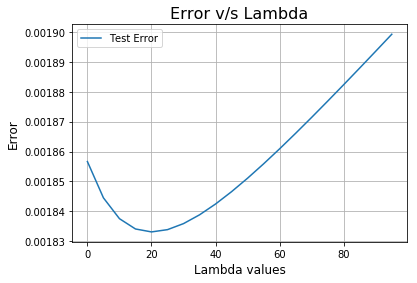

In [236]:
import matplotlib.pyplot as plt
plt.plot(lambda_list, err_list, label="Test Error")
# plt.plot(lambda_list, el, label="Training Error")
plt.xlabel('Lambda values',fontsize=12)
plt.ylabel('Error',fontsize=12)
plt.title('Error v/s Lambda',fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

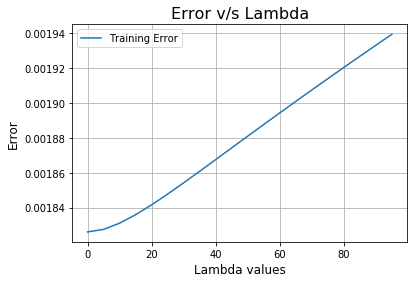

In [237]:
import matplotlib.pyplot as plt
# plt.plot(lambda_list, err_list, label="Test Error")
plt.plot(lambda_list, el, label="Training Error")
plt.xlabel('Lambda values',fontsize=12)
plt.ylabel('Error',fontsize=12)
plt.title('Error v/s Lambda',fontsize=16)
plt.legend()
plt.grid(True)
plt.show()